# Graph Fourier Transform Distinguishes Surfaces
Sample a point cloud uniformly from two regions, a disk and a square. Construct a weighted graph, the "epsilon ball weight matrix", where edges are weighted by the distance between points in the cloud. The shapes can be distinguished by comparing the spectra of the graph Laplacian.

In [40]:
import graphlearning as gl
import matplotlib.pyplot as plt
import numpy as np
import random

n = 1000

#Random points in a box
eps = 0.25 #Connectivity
X = np.random.rand(n,2)
W = gl.weightmatrix.epsilon_ball(X,eps)
G = gl.graph(W)

#Eigenvectors of graph Laplacian (we can change the normalization later)
vals_square, vecs_square = G.eigen_decomp(k=50,normalization='normalized')

#Random points in a circle
eps = 0.25 #Connectivity
X = gl.utils.rand_ball(n,2)
W = gl.weightmatrix.epsilon_ball(X,eps)
G = gl.graph(W)

#Eigenvectors of graph Laplacian (we can change the normalization later)
vals_disk, vecs_disk = G.eigen_decomp(k=50,normalization='normalized')

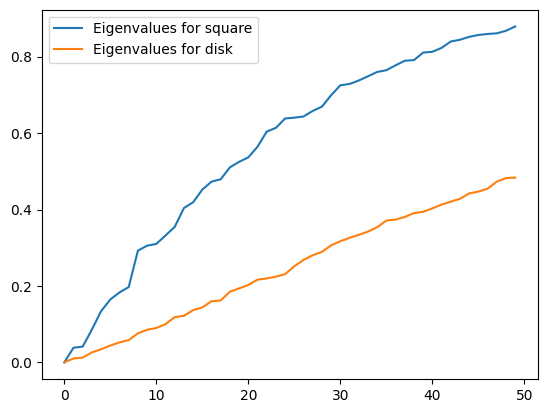

In [41]:
#Plot eigenvalues
plt.plot(vals_square,label='Eigenvalues for square')
plt.plot(vals_disk,label='Eigenvalues for disk')
plt.legend()
plt.savefig('eigenvalues.png')
plt.show()

#Multiplcation by the transpose of the matrix vecs_disk or vecs_square is the graph Fourier transform

# Distinguishing Parameterized 2D Surfaces
Example - ellipses of different eccentricity. Ellipses with equal eccentricity will not be distinguished as eigenvalues will be the same. 

In [57]:
def ellipse(a, b, n):
    xrange = np.linspace(-a, a, n*10)
    yrange = []
    X = []
    for x in xrange:
        y = b*(1-x**2/a**2)**0.5
        X.append([x, y])
        X.append([x, -y])
    X = random.sample(X, n) # randomly sample point cloud without replacement
    return np.array(X)

e1 = ellipse(7, 3, 1000)
eps = 0.25 #Connectivity
W = gl.weightmatrix.epsilon_ball(e1, eps)
G = gl.graph(W)
vals_e1, vecs_e1 = G.eigen_decomp(k=50,normalization='normalized')

e2 = ellipse(2, 5, 1000)
eps = 0.25 #Connectivity
W = gl.weightmatrix.epsilon_ball(e2, eps)
G = gl.graph(W)
vals_e2, vecs_e2 = G.eigen_decomp(k=50,normalization='normalized')

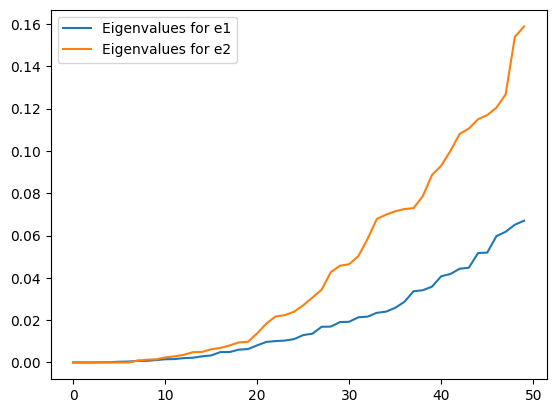

In [58]:
#Plot eigenvalues
plt.plot(vals_e1,label='Eigenvalues for e1')
plt.plot(vals_e2,label='Eigenvalues for e2')
plt.legend()
plt.savefig('eigenvalues_2.png')
plt.show()